# **VISUALISASI DATA — MODUL 5 (TUGAS VERSI 1)**

**Nama:** Mochammad Delvin Farhan Akbar  
**Dataset:** Netflix TV Shows and Movies (titles_clean.csv)  
**Tools:** Python, Pandas, Seaborn, Matplotlib  
[Link Notebook](https://colab.research.google.com/drive/1v-7rJOjv1f1FSV3wmOLr-IQY9pvVdb-Z?usp=sharing
)  
  
  Dataset yang digunakan berisi ribuan judul film dan acara TV di platform Netflix, lengkap dengan informasi seperti tahun rilis, negara produksi, genre, serta skor IMDb. Tujuan laporan ini adalah menyajikan lima insight utama hasil eksplorasi pada Modul 4 menggunakan visualisasi yang ringkas, informatif, dan berorientasi pada keputusan strategis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter

df = pd.read_csv("titles_clean.csv")

df['genres'] = df['genres'].dropna().apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].dropna().apply(ast.literal_eval)

### **1. Netflix menunjukkan preferensi produksi yang lebih besar terhadap film daripada acara televisi**

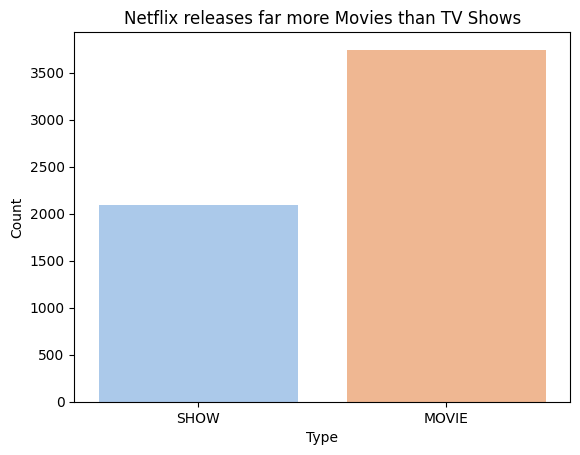

In [8]:
sns.countplot(data=df, x='type', palette='pastel', hue='type')
plt.title("Netflix releases far more Movies than TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Hasil visualisasi menunjukkan bahwa jumlah film (MOVIE) jauh lebih banyak dibandingkan serial (SHOW). Hal ini sejalan dengan strategi awal Netflix yang fokus pada konten film sebelum memperluas investasi di serial orisinal.

**Insight utama**:  
Dominasi film menandakan preferensi produksi yang masih berat ke arah konten berdurasi panjang.

**Keputusan stakeholder**:  
Tingkatkan porsi investasi pada serial agar portofolio konten menjadi lebih seimbang dan menarik penonton jangka panjang.

### **2. Jumlah produksi konten netflix mencapai puncaknya sekitar tahun 2019**

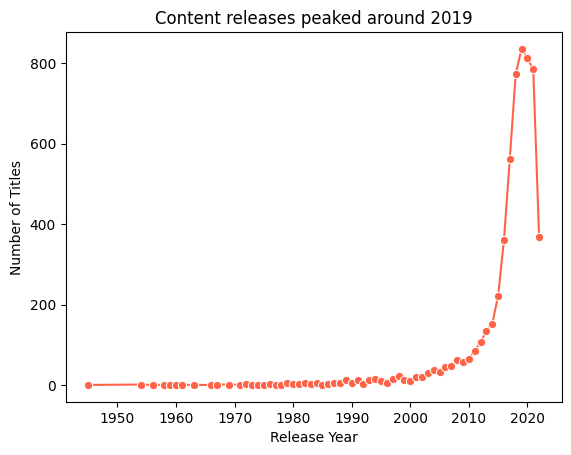

In [4]:
release = df['release_year'].value_counts().sort_index()
sns.lineplot(x=release.index, y=release.values, marker='o', color='tomato')
plt.title("Content releases peaked around 2019")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

Tren jumlah rilis konten per tahun memperlihatkan peningkatan tajam mulai dari 2015 dan mencapai puncaknya pada tahun 2019. Setelah itu, tren cenderung menurun yang kemungkinan dipengaruhi pandemi COVID-19 dan perubahan strategi produksi global.

**Insight utama:**  
2019 menjadi titik tertinggi ekspansi konten Netflix.

**Keputusan stakeholder:**  
Gunakan tahun 2019 sebagai acuan evaluasi untuk mengukur efektivitas strategi konten dan merencanakan siklus produksi tahunan ke depan.

### **3. Amerika Serikat mendominasi total produksi, tetapi India unggul dalam film-film berkualitas tinggi (IMDb > 8)**

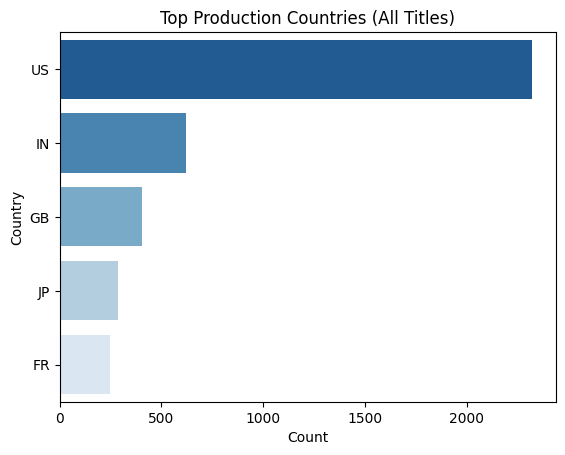

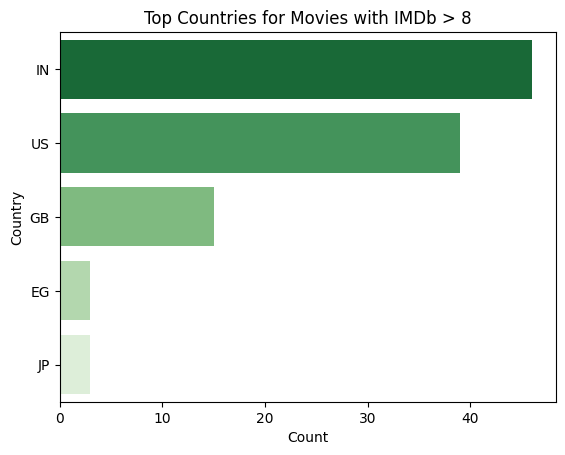

In [9]:
# Top 5 negara berdasarkan total produksi
all_countries = [c for lst in df['production_countries'] for c in lst]
top_all = pd.Series(all_countries).value_counts().head(5)
sns.barplot(x=top_all.values, y=top_all.index, palette='Blues_r', hue=top_all.index)
plt.title("Top Production Countries (All Titles)")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Negara dengan IMDb > 8
high = df[(df['type']=="MOVIE") & (df['imdb_score']>8)]
high_countries = [c for lst in high['production_countries'] for c in lst]
top_high = pd.Series(high_countries).value_counts().head(5)
sns.barplot(x=top_high.values, y=top_high.index, palette='Greens_r', hue=top_high.index)
plt.title("Top Countries for Movies with IMDb > 8")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

Secara keseluruhan, Amerika Serikat menghasilkan konten terbanyak di Netflix. Namun, bila dilihat dari kualitas (skor IMDb > 8), India justru unggul dibanding negara lain. Ini menunjukkan tingginya standar produksi tertentu di industri film India (Bollywood).

**Insight utama:**  
Kuantitas tidak selalu berbanding lurus dengan kualitas.

**Keputusan stakeholder:**  
Bangun kemitraan lebih erat dengan studio film India untuk memperkuat portofolio konten berkualitas tinggi.

### **4. Genre drama mendominasi distribusi genre di Netflix**

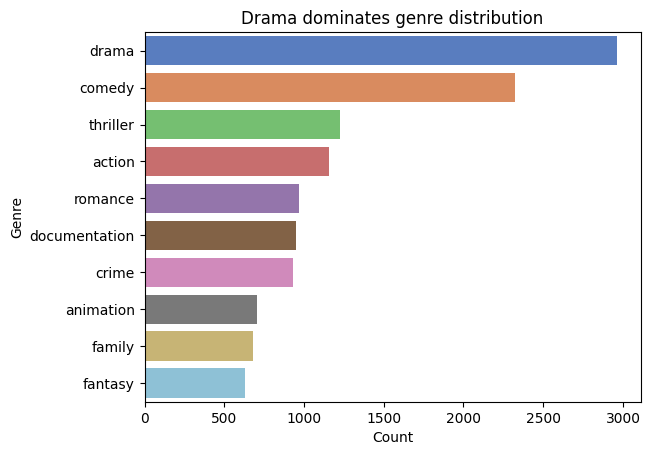

In [10]:
genres = [g for lst in df['genres'] for g in lst]
top_genres = pd.Series(genres).value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted', hue=top_genres.index)
plt.title("Drama dominates genre distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Genre Drama muncul sebagai kategori paling dominan, diikuti oleh Comedy, Thriller, dan Action. Dominasi drama menggambarkan preferensi penonton global terhadap cerita yang emosional dan berlapis.

**Insight utama:**  
genre drama menjadi pilar utama di katalog Netflix.

**Keputusan stakeholder:**  
Perkuat investasi di genre drama premium serta eksplorasi sub-genre baru (romantic drama, psychological drama) untuk mempertahankan daya tarik pasar global.

### **5. Kategori usia tidak memiliki pengaruh signifikan terhadap skor IMDb**

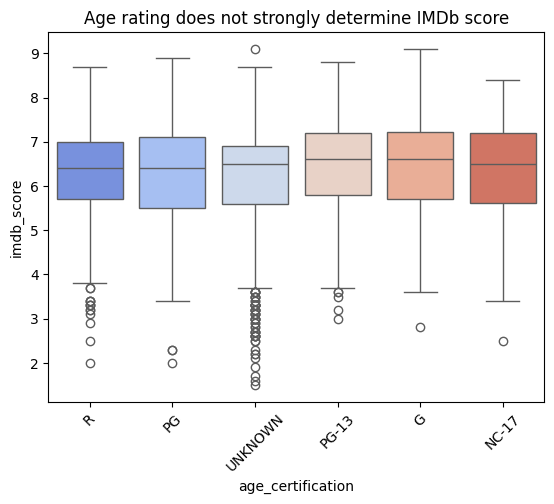

In [11]:
movies = df[df['type']=="MOVIE"]
sns.boxplot(data=movies, x='age_certification', y='imdb_score', palette='coolwarm', hue='age_certification')
plt.title("Age rating does not strongly determine IMDb score")
plt.xticks(rotation=45)
plt.show()

Distribusi skor IMDb untuk tiap kategori usia menunjukkan hasil yang hampir serupa. Tidak ada pola signifikan bahwa film dengan rating dewasa (R/TV-MA) memiliki skor lebih tinggi dari rating remaja (PG-13/TV-14).

**Insight utama:**  
Kualitas film tidak ditentukan oleh kategori usia.

**Keputusan stakeholder:**  
Fokus pada kualitas naskah, sinematografi, dan arah cerita — bukan sekadar menentukan target usia tertentu.

## **Kesimpulan**

Berdasarkan hasil visualisasi data terhadap dataset Netflix TV Shows and Movies, dapat disimpulkan bahwa platform Netflix masih lebih berfokus pada produksi film dibandingkan serial, yang terlihat dari jumlah film yang jauh lebih banyak. Tren jumlah rilis konten juga menunjukkan peningkatan signifikan sejak tahun 2015 dan mencapai puncaknya pada tahun 2019, yang menandakan periode ekspansi besar-besaran Netflix dalam menghadirkan konten baru. Dari sisi geografis, Amerika Serikat menjadi negara dengan jumlah produksi terbanyak, tetapi India justru menonjol dalam hal kualitas dengan kontribusi film-film yang memiliki skor IMDb di atas 8. Hal ini menggambarkan bahwa jumlah produksi yang besar tidak selalu sejalan dengan kualitas yang tinggi.

Dari sisi jenis konten, genre drama mendominasi katalog Netflix, diikuti oleh komedi, thriller, dan action, yang menunjukkan preferensi penonton global terhadap cerita yang emosional dan kompleks. Sementara itu, analisis terhadap rating usia menunjukkan bahwa kategori usia tidak memiliki pengaruh signifikan terhadap skor IMDb suatu film. Artinya, kualitas film lebih dipengaruhi oleh aspek seperti alur cerita, penulisan naskah, dan kualitas produksi daripada batasan usia penonton.

Secara keseluruhan, insight yang diperoleh menunjukkan bahwa Netflix dapat mempertimbangkan strategi diversifikasi dengan meningkatkan produksi serial, mengeksplorasi genre baru, serta memperluas kerja sama internasional dengan negara-negara yang memiliki rekam jejak film berkualitas tinggi seperti India. Selain itu, fokus terhadap peningkatan kualitas cerita dan produksi perlu terus dipertahankan agar konten Netflix tetap kompetitif dan relevan dengan selera pasar global yang terus berkembang.